<a href="https://colab.research.google.com/github/resonk/Modelado_Simulacion/blob/main/v2_constiruci%C3%B3n_politica_ejercicio_grupo7_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
<br>

María Patricia Amortegui Vargas<br>
Sandra Yanir Montenegro Munoz<br>
Javier Hernán Jiménez Beltrán<br>
Rómulo Arturo Vanegas Gaitan<br>





In [1]:
! pip install spacy
! python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
from spacy import displacy


In [3]:
nlp = spacy.load("es_core_news_md")

In [4]:

import requests


In [5]:
doc_url = 'https://tatooinesoftware.com/tadeo/COLOMBIA-Constitucion.txt'
doc_response = requests.get(doc_url)
texto = doc_response.text
texto = texto.encode('latin-1').decode('utf-8')
print(f'longitud texto {len(texto)} caracteres')
print(texto[:1000])

longitud texto 162022 caracteres
﻿Constitución Política de Colombia 
2016
CONSTITUCIÓN POLÍTICA DE COLOMBIA 1991 Actualizada con los Actos Legislativos a 2016 
Edición especial preparada por la Corte Constitucional Consejo Superior de la Judicatura 
Centro de Documentación Judicial– CENDOJ Biblioteca Enrique Low Murtra -BELM
Título de la Colección: Normatividad 
ISBN: 
Editado por: Corte Constitucional 
Consejo Superior de la Judicatura 
Centro de Documentación Judicial -CENDOJ 
Biblioteca Enrique Low Murtra- BELM
´ 


CONTENIDO 
PREÁMBULO 
TÍTULO I 
DE LOS PRINCIPIOS FUNDAMENTALES (Artículos 1 – 10)  
TÍTULO II 
DE LOS DERECHOS, LAS GARANTÍAS Y LOS DEBERES 
Capítulo 1. De los derechos fundamentales (Artículos 11 - 41) Capítulo 2. De los derechos sociales, económicos y culturales (Artículos 42 – 77) Capítulo 3. De los derechos colectivos y del ambiente (Artículos 78 – 82) Capítulo 4. De la protección y aplicación de los derechos (Artículos 83 – 94) Capítulo 5. De los deberes y obligaci

In [6]:
# -  Quitamos el preámbulo de la constituciòn polìtica de Colombia
index = texto.find('PREÁMBULO')
texto = texto[index:]
print(f'longitud texto {len(texto)} caracteres')
print(texto[:1000])

longitud texto 161504 caracteres
PREÁMBULO 
TÍTULO I 
DE LOS PRINCIPIOS FUNDAMENTALES (Artículos 1 – 10)  
TÍTULO II 
DE LOS DERECHOS, LAS GARANTÍAS Y LOS DEBERES 
Capítulo 1. De los derechos fundamentales (Artículos 11 - 41) Capítulo 2. De los derechos sociales, económicos y culturales (Artículos 42 – 77) Capítulo 3. De los derechos colectivos y del ambiente (Artículos 78 – 82) Capítulo 4. De la protección y aplicación de los derechos (Artículos 83 – 94) Capítulo 5. De los deberes y obligaciones (Artículo 95) 
TÍTULO III  
DE LOS HABITANTES Y DEL TERRITORIO 
Capítulo 1. De la nacionalidad (Artículos 96 – 97) 
Capítulo 2. De la ciudadanía (Artículos 98 - 99) 
Capítulo 3. De los extranjeros (Artículos 100) 
Capítulo 4. Del territorio (Artículos 101 -102) 
TÍTULO IV 
DE LA PARTICIPACIÓN DEMOCRÁTICA Y DE LOS PARTIDOS POLÍTICOS 
Capítulo 1. De las formas de participación democrática (Artículos 103 – 106) Capítulo 2. De los partidos y de los movimientos políticos (Artículos 107 - 111) Capít

In [16]:
# - quitar stopwords y lemmatizar

# textos largos generan problemas de memoria RAM entonces dividamoslo
n= len(texto)//100
textos = [texto[i:i+n] for i in range(0, len(texto), n)]



texto_limpio=''
for text_part in textos:
  doc = nlp(text_part)
  texto_parte = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
  texto_limpio+= ' '.join(texto_parte)

# TODO: que mas tareas de limpieza puedes realizar?

# token.is_punct  token.is_stop  token.like_url token.is_space  token.pos_ == "CONJ"
# visualizamos los primeros 1000 caracteres.
#print(texto_limpio[:1000])

# Limpeza de palabras específicas
texto = texto_limpio

# Palabras a eliminar con capitalización exacta
palabras_a_eliminar = {"TÍTULO", "Artículos", "Capítulo", "título","Artículo","artículo","CAPÍTULO" }

# Dividir el texto en palabras
palabras = texto.split()

# Filtrar palabras manteniendo la capitalización exacta
palabras_filtradas = [palabra for palabra in palabras if palabra not in palabras_a_eliminar]

# Unir las palabras filtradas en un texto
texto_filtrado = ' '.join(palabras_filtradas)

# Expresión regular para números romanos
regex_romanos = r'\b[Mm]{0,4}(C[MDmd]|c[MDmd]|[DdCc])?(X[CLcl]|x[CLcl]|[LlXx]{0,3})?(I[XxVv]|i[XxVv]|[VvIi]{0,3})\b'

# Reemplazar números romanos con una cadena vacía
texto_sin_romanos = re.sub(regex_romanos, '', texto_filtrado)

# Expresión regular para quitar digitos
Texto_Sin_Digitos=re.sub(r'\d+', '', texto_sin_romanos)

print(Texto_Sin_Digitos[:2000])

texto_limpio=Texto_Sin_Digitos

NameError: name 're' is not defined

(-0.5, 399.5, 199.5, -0.5)

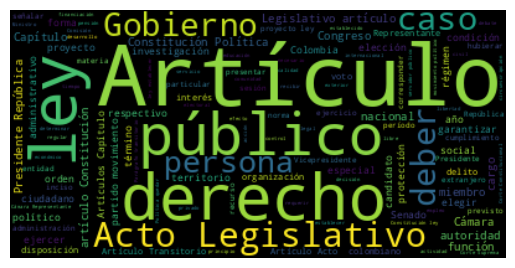

In [17]:
from wordcloud import WordCloud
nube = WordCloud().generate(texto_limpio)

plt.imshow(nube, interpolation='bilinear')
plt.axis("off")

Análisis.

La nube de palabras muestra una clasificación teniendo como patrón el tamaño de las palabras y como estas destacan dentro de la imagen, de la siguiente manera: • Palabras destacadas: La nube de palabras muestra que el documento es predominantemente con las palabras ley y derecho, lo que refleja temas fundamentales en la Constitución, sugiriendo que el texto trata sobre el marco legal y los derechos dentro de la Constitución. • Palabras Menos Destacadas pero Notables: Deber y Caso, Persona, Acto, Legislativo, Gobierno, Cargo, Congreso, Autoridad, pueden centrarse o referirse a la estructura del gobierno y las funciones. • También la Participación y Derechos: Palabras como "ciudadano" y "elegir" indican la relevancia de los derechos individuales y la participación. • Palabras Menores pero Relevantes: Político, Candidato, presidente de la República, Nacional, Especial, Constitución Política, Régimen, Elegir, Miembro, Cámara, Senado, Ciudadano, Estas palabras indican aspectos específicos de la política y la estructura del gobierno Por lo anterior, la nube de palabras refleja la naturaleza de la Constitución.

In [18]:
texto_limpio

'preámbulo \r\n   TÍTULO I \r\n   principio FUNDAMENTALES Artículos 1 10  \r\n   TÍTULO II \r\n   DERECHOS GARANTÍAS deber \r\n   Capítulo 1 derecho fundamental Artículos 11 41 Capítulo 2 derecho social económico cultural Artículos 42 77 Capítulo 3 derecho colectivo ambiente Artículos 78 82 Capítulo 4 protección aplicación derecho Artículos 83 94 Capítulo 5 deber obligación Artículo 95 \r\n   TÍTULO III  \r\n   habitante territorio \r\n   Capítulo 1 nacionalidad Artículos 96 97 \r\n   Capítulo 2 ciudadanía artículo 98 99 \r\n   Capítulo 3 extranjero Artículos 100 \r\n   Capítulo 4 territorio Artículos 101 -102 \r\n   título iv \r\n   participación democrático PARTIDOS político \r\n   Capítulo 1 forma participación democrático Artículos 103 106 Capítulo 2 partido movimiento político Artículos 107 111 Capítulo 3 estatuto oposición Artículo 112 \r\n   TÍTULO V  \r\n   organización \r\n   Capítulo 1 estructura Artículos 113 121 \r\n   Capítulo 2 función público Artículos 122 131 \r\n   TÍT

cantidad tokens: (9065,)


(-0.5, 399.5, 199.5, -0.5)

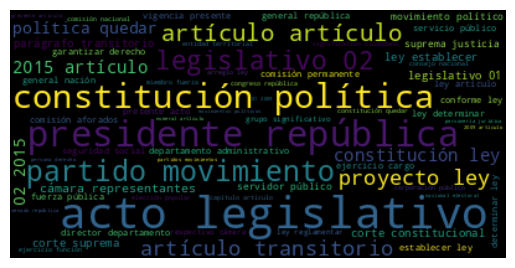

In [15]:
# de nuestro tokenizador con bigramas
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# por ejemplo usemos solo los bigramas que se repiten mas de 2 veces.
vectorizer = CountVectorizer( ngram_range=(2, 2))
X = vectorizer.fit_transform([texto_limpio])

print(f'cantidad tokens: {vectorizer.get_feature_names_out().shape}')

# creamos a diccionario para enviar a la nube de palabras
diccionario = {}
for palabra, frecuencia in zip(vectorizer.get_feature_names_out(), X.toarray()[0]):
    if frecuencia >= 2:
      diccionario[palabra]=frecuencia


nube = WordCloud().generate_from_frequencies(diccionario)

plt.imshow(nube, interpolation='bilinear')
plt.axis("off")



Análisis

Para este ejercicio se utilizaron bigramas, es decir, conjuntos de dos palabras que suelen aparecer juntas en el texto de la "Constitución Política de Colombia". Tras un proceso de limpieza y tokenización, se pudo obtener una imagen más clara sobre los temas principales y cómo se relacionan las palabras clave.

Entre los pares de palabras más comunes encontramos "acto legislativo", que se menciona 62 veces, "presidente república" con 42 menciones y "constitución política" con 35. Esto podría indicar que la Constitución ha sido modificada en varias ocasiones mediante actos legislativos y que el papel del presidente es central en el documento.

También se destacan otros términos como "proyecto ley", "legislativo constitución", "corte suprema", "cámara representantes" y "corte constitucional". Estos reflejan un enfoque claro en el proceso legislativo, las instituciones gubernamentales y el sistema judicial, que son pilares fundamentales en la estructura del Estado.

Además, encontramos expresiones como "determinar ley", "establecer ley", "reglamentar ley" y "garantizar derecho", lo que subraya que uno de los grandes objetivos de la Constitución es la creación, regulación y aplicación de leyes, además de garantizar los derechos de los ciudadanos.

En resumen, el análisis de estos términos nos brinda una perspectiva valiosa sobre los temas centrales y las relaciones entre las palabras más relevantes de la Constitución, destacando su enfoque legislativo y la protección de los derechos en su contenido.

In [12]:
#@title Función grafica de barras limitada
def grafica_de_barras(diccionario, titulo, limitar=30, dim_figura=(8, 5),):
    """ Grafica de barras de un diccionario.

    Args:
      diccionario:
      titulo:
      limitar:
      dim_figura:
    """

      # Ordenar datos en un dataframe
    df = pd.DataFrame.from_dict(diccionario, orient="index")
    df = df.reset_index()
    df.columns = ["n_grama", "frecuencia"]
    df = df.sort_values(by="frecuencia", ascending=False)

    # Limitar datos
    df = df.head(limitar)
    # Crear gráfica
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=dim_figura)
    y_pos = np.arange(len(df["frecuencia"]))
    ax.barh(y_pos, df["frecuencia"], align="center")
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["n_grama"])
    ax.set_title(titulo)
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel("Término")
    plt.tight_layout()
    #
    for i, v in enumerate(df["frecuencia"]):
        ax.text(v, i, v, fontsize=10, verticalalignment="center")
    plt.show()




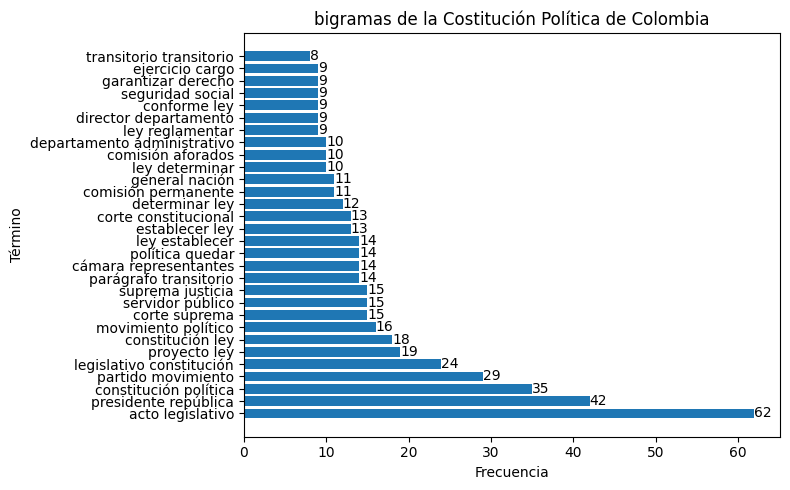

In [ ]:
grafica_de_barras(diccionario, 'bigramas de la Costitución Política de Colombia')

Análisis. <br>
El gráfico muestra los bigramas (las parejas de palabras) de mayor frecuencia en el texto de la constitución política de Colombia una vez hecha tokenización y limpieza de texto.
El top 5 de los bigramas mas frecuentes son:
Acto Legislativo: 62 veces
Presidente república: 42 veces
Constitución política:  35 Veces.
Partido Movimiento: 29 Veces.
Legislativo Constitución:  24 Veces.
Análisis:
Como los bigramas que más ser repiten son "acto legislativo" (62 veces) esto indica que la constitución política de Colombia de acuerdo con la versión analizada a sido reformada por muchos “actos legislativos”.
Por otro lado, el otro bigrama que de mayor frecuencia es “presidente de la República” lo que indica que para el texto analizado es muy importante ese rol.

Teniendo en cuenta la globalidad de la gráfica se podría concluir que los temas destacados en el texto analizado son:
1.	Proceso Legislativo y Modificaciones: Se deduce a partir de los bigramas: acto legislativo (62 veces)", "proyecto ley (19 veces)", "legislativo constitución (24 veces).
2.	 Instrucciones Gubernamentales: Corte Suprema (15 veces), Cama de Representantes (14 veces), Corte Constitucional (13 veces), Departamento Administrativo (10 veces.)
3.	Verbos:  Determinar ley (12 veces), establecer ley (13 veces), reglamentar ley (9 veces), garantizar derecho (9 veces), de lo cual se podría deducir que el documento tiene un enfoque en la creación, regulación y aplicación de leyes, así como en la protección de los derechos.


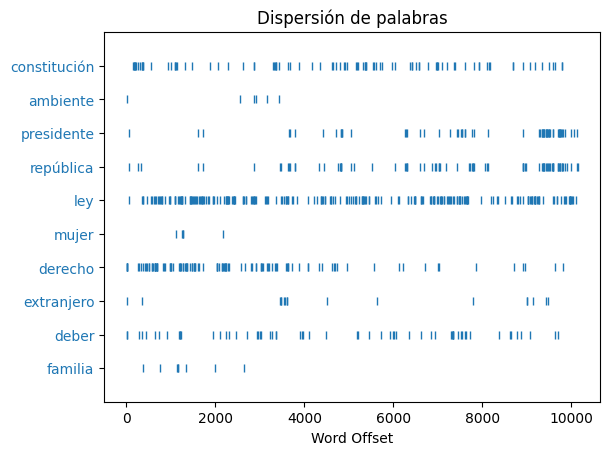

In [ ]:
from nltk.draw.dispersion import dispersion_plot
# Se definen las palabras de interés
mis_palabras = ['constitución', 'ambiente' ,'presidente', 'república', 'ley', 'mujer', 'derecho' , 'extranjero','deber','familia']

# Gráfico de dispersión
ax= dispersion_plot(texto_limpio.split(), mis_palabras, ignore_case=True, title='Dispersión de palabras')
# error axis y invertido https://stackoverflow.com/questions/77262318/python-nltk-text-dispersion-plot-has-y-vertical-axis-is-in-backwards-reversed
ax.set_yticks(list(range(len(mis_palabras))), reversed(mis_palabras), color="C0")
plt.show()

Análisis<br>
En la gráfica vemos la dispersión de palabra a lo largo del texto analizado. Las palabras ley y derecho están distribuidas con mas frecuencia de principio a fin del texto en cambio palabras como ambiente, mujer y familia aparecen antes de la mitad del texto. La palabra extranjero se menos frecuente, pero se distribuye a lo largo del texto.
Las palabras 'presidente' y 'república' presentan un comportamiento similar, ya que aparecen predominantemente en bigramas, como se ilustró en la gráfica anterior.


In [14]:

#@title matriz de coocurrencias (adapatado de Contexto)
from collections import Counter
from collections.abc import Iterable

def tokenizar(texto):
    if isinstance(texto, str):
        return texto.split()
    # Si es una lista o colección de strings, se aplica a cada uno
    elif isinstance(texto, Iterable):
        return [i.split() for i in texto]
    else:
        print(
            (
                "Tipo de entrada no válido. Debe ingresar "
                "un string o una lista de strings."
            )
        )
        return None

def matriz_coocurrencias(
    texto,
    min_frec=1,
    max_num=200,
    modo="documento",
    ventana=3,
    tri_sup=False,
    limpiar=False,
    tokenizador=None,
):
    """
    Calcula la matriz de coocurrencias de un texto.

    :param texto: Corresponde al texto (o lista de textos/documentos) que \
        se desea analizar.
    :type texto: str, list
    :param min_frec: Frecuencia mínima de aparición de palabras, si la \
        frecuencia de una palabra es menor a `min_frec`, será excluida de la \
        matriz. Valor por defecto `1`.
    :type min_frec: int, opcional
    :param max_num: Número máximo de palabras que se incluyen en la matriz \
        (se eligen las más frecuentes). Valor por defecto `200`.
    :type max_num: int, opcional
    :param modo: Corresponde al modo de análisis, con `'documento'` se \
        calcula la coocurrencia de términos sin importar la distancia entre \
        estos,  con `'ventana'` se calcula la coocurrencia de términos \
        teniendo en cuenta una distancia máxima entre estos. \
        Valor por defecto `'documento'`.
    :type modo: {'documento', 'ventana'}, opcional
    :param ventana: Tamaño de la ventana (solo cuando `modo = 'ventana'`). \
        Número de palabras anteriores o posteriores a tener en cuenta con \
        respecto al término de análisis, equivalente a calcular la \
        coocurrencia con n-gramas, siendo  `n = ventana + 1`. \
        Valor por defecto `3`.
    :type ventana: int, opcional
    :param tri_sup: Si es `True` devuelve la versión diagonal superior de la \
        matriz de coocurrencias, si es `False` devuelve la matriz completa. \
        Valor por defecto `False`.
    :type tri_sup: bool, opcional
    :param limpiar: Define si se desea hacer una limpieza básica (aplicando \
        la función `limpieza_basica` del módulo `limpieza`) al texto, antes \
        de calcular las coocurrencias. Valor por defecto `False`.
    :type limpiar: bool, opcional
    :param tokenizador: Objeto encargado de la tokenización y detokenización \
        de textos. Si el valor es 'None', se utilizará por defecto una \
        instancia de la clase *TokenizadorNLTK*. Valor por defecto `None`.
    :type tokenizador: Tokenizador, opcional
    :return: (pandas.DataFrame) Matriz de coocurrencias de los textos de \
        entrada.
    """
    # Generar un solo texto con todos los documentos

    texto_entero = str(texto)
    texto = [texto_entero]  # Convertir variable "texto" en un iterable


    # Generar lista de palabras en todos los textos juntos
    palabras = tokenizar(texto_entero)
    # Dejar solo las palabras con mayor frecuencia y/o que cumplan una
    # frecuencia mínima
    cuenta = dict(Counter(palabras).most_common(max_num))
    cuenta_filt = {k: v for k, v in cuenta.items() if v >= min_frec}
    nombres = list(set(cuenta_filt.keys()))
    # Inicializar en ceros la matriz de coocurrencias
    mat_oc = pd.DataFrame(
        np.zeros([len(nombres), len(nombres)]), columns=nombres, index=nombres
    )
    if modo == "ventana":
        for t in texto:
            palabras_t = tokenizar(t)
            # Ciclo a través de las palabras para obtener las coocurrencias:
            for i, p1 in enumerate(palabras_t):
                inicio = max(0, i - ventana)
                fin = min(len(palabras), i + ventana + 1)
                for j, p2 in enumerate(palabras_t[inicio:fin]):
                    if (p2 in nombres) and (p1 in nombres):
                        if p1 != p2:
                            mat_oc[p2][p1] += 1
                        else:
                            if (inicio + j) != i:
                                mat_oc[p2][p1] += 1
    elif modo == "documento":
        for t in texto:
            cuenta_t = dict(Counter(tokenizar(t)))
            for p1 in nombres:
                for p2 in nombres:
                    if p1 != p2:
                        if p1 in cuenta_t and p2 in cuenta_t:
                            mat_oc[p2][p1] += cuenta_t[p1] * cuenta_t[p2]
                    else:
                        if p1 in cuenta_t:
                            mat_oc[p2][p1] += cuenta_t[p1]

    # Ordenar filas y columnas alfabeticamente
    mat_oc.sort_index(inplace=True)
    mat_oc = mat_oc.reindex(sorted(mat_oc.columns), axis=1)
    # TODO: implementar
    # if tri_sup:
    #    mat_oc = diag_superior(mat_oc)

    return mat_oc


In [13]:
#@title grafica coocurrencias (adaptado de Contexto)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings


# Definir lista de vértices (nodes)
def normalize_size(size, vmin=10, vmax=40, scale=700):
    """
    Normaliza el tamaño del nodo para ser graficado

    :param size: Tamaño del nodo
    :type size: float
    :param vmin: Tamaño minimo del nodo, por defecto `10`.
    :type vmin: int, opcional
    :param vmax: Tamaño máximo del nodo, por defecto `40`.
    :type vmax: int, opcional
    :param scale: Escala de tamaño para los nodos, por defecto `700`.
    :type scale: int, opcional
    :return: (float) Retorna el tamaño del nodo, normalizado entre \
        `vmin*scale` y `vmax*scale`.
    """
    return int((size / vmax) * scale + vmin)


def graficar_coocurencia(
    mat,
    vmin=10,
    vmax=None,
    escala=700,
    n_nodos=0,
    titulo="Gráfico de Coocurrencias",
    dim_figura=(10, 6),
    node_cmap="RdPu",
    edge_cmap="Blues",
    offset_y=0.08,
    font_color="white",
    node_font_size=12,
    label_font_size=10,
    visualizar=True,
    ubicacion_archivo=None,
    devolver_grafica=False,
    seed=12,
):
    # Objeto del grafo
    G = nx.Graph()

    # Mapas de colores
    node_cmap = cm.get_cmap(node_cmap)
    edge_cmap = cm.get_cmap(edge_cmap)

    # máximo valor de la matriz
    max_cooc = max(mat.max())

    # calculando los bordes del grafo
    for indice, fila in mat.iterrows():
        for i, col in enumerate(fila):
            peso = float(col) / np.log10(max_cooc)
            if peso > 0 and (indice != mat.columns[i]):
                G.add_edge(indice, mat.columns[i], weight=round(peso, 1))

    # Eliminar nodos por criterio Numero o porcentaje
    if n_nodos > 0 and n_nodos <= 1:
        orden = sorted(list(G.degree), key=lambda kv: kv[1])[::-1]
        n = int(len(orden) * n_nodos)
        for no in orden[n:]:
            G.remove_node(no[0])
    elif n_nodos > 1:
        if n_nodos > len(G):
            warnings.warn(
                "n_nodos sobrepasa el número de nodos totales. "
                "Se tomarán todos los nodos del grafo."
            )
        else:
            orden = sorted(list(G.degree), key=lambda kv: kv[1])[::-1]
            for no in orden[n_nodos:]:
                G.remove_node(no[0])

    # Máximo grado de conexiones
    if vmax is None:
        vmax = max(list(dict(G.degree).values()))

    # Normalzizar el tamaño de los nodos
    node_size = [
        normalize_size(g, vmin=vmin, vmax=vmax, scale=escala)
        for g in list(dict(G.degree).values())
    ]
    # Valor máximo de las conexiones
    vmax = max(list(nx.get_edge_attributes(G, "weight").values()))
    # Normalizando el peso de las conexiones
    w_edges = [
        w / vmax for w in list(nx.get_edge_attributes(G, "weight").values())
    ]

    # posicion de los nodos
    pos = nx.spring_layout(G, seed=seed)

    # objeto fig de matplotlib
    fig, ax = plt.subplots(figsize=dim_figura)

    # gráficar nodos
    nodes = nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_size,
        node_color=list(dict(G.degree).values()),
        cmap=node_cmap,
    )
    # Colores para las conexiones
    edge_colors = [edge_cmap(c) for c in w_edges]

    # graficar conexiones entre nodos
    edges = []
    for e in range(G.number_of_edges()):
        edges.append(
            nx.draw_networkx_edges(
                G,
                pos,
                edgelist=[list(G.edges())[e]],
                edge_color=edge_colors[e],
                width=1.2,
            )
        )

    # Cambiar el plano en el grafico para traslape de conexiones
    for e in range(G.number_of_edges()):
        edges[e].set_zorder(int(w_edges[e] * G.number_of_edges()))

    # Poner los nodos por encima de las conexiones
    nodes.set_zorder(G.number_of_edges() + 1)

    # Ubicando textos y grados de los nodos
    for key, value in pos.items():
        x, y = value[0] + 0, value[1] - offset_y
        plt.text(
            x,
            y,
            s=key,
            horizontalalignment="center",
            fontsize=label_font_size,
            zorder=G.number_of_edges() + 1,
        )
        plt.text(
            x,
            y - 0.015 + offset_y,
            s=G.degree[key],
            horizontalalignment="center",
            fontsize=node_font_size,
            color=font_color,
            zorder=G.number_of_edges() + 1,
        )

    # Ubicando colorbar del gráfico
    plt.colorbar(
        nodes,
        label="Número de conexiones",
        orientation="vertical",
        shrink=0.4,
    )

    ax.set_title(titulo, {"fontsize": 15, "fontweight": 700})
    plt.axis("off")
    if visualizar:
        plt.show()

    if ubicacion_archivo is not None:
        plt.savefig(
            ubicacion_archivo,
            bbox_inches="tight",
            transparent=False,
            facecolor="w",
            dpi=300,
        )

    if not visualizar and ubicacion_archivo is None:
        warnings.warn("Por favor fije una ruta para guardar la imagen")

    if devolver_grafica:
        return fig

    return ax

In [ ]:
import re

In [ ]:
texto =  """ infraestructura físico adecuación tierra promover investigación transferencio tecnología producción alimento materia primo origen agropecuario propósito incrementar productividad  disposición dictar materia crediticio reglamentar condiceírn especialcrédito agropecuario ciclocosechar precio riesgo inherenactividad calamidad ambiental educación derechpersona serviciopúblico función socibuscar acceso conocimiento ciencio técnico valor cultura educación formar colombianorespeto derechos humanos paz democracio práctico trabajo recriración mejoramiento cultural científico tecnológico protección ambiente sociedad familio responsable educación obligatorio quince año edad comprender mínimo año preescolar educación básico educación gratuito institución perjuicio cobro derecho académico sufragar corresponder regular ejercer supremo inspección vigilancia educación velar calidad cumplimiento formación moral intelectual físico educar garantizar adecuado cubrimiento servicio asegurar menor condición necesario acceso permanencio sistema educativo Nación entidad territorial participar dirección financiación administración servicio educativo estatal término señalir Constitución ley  particular fundar establecimiento educativo ley establecer condicióncreación gestión comunidad educativo participarr dirección institución educación enseñanza cargpersona reconocir idoneidad ético pedagógico ley garantizar profesionalización dignificación actividod docente padre familia derechescoger tipo educación hijo menorstablecimiento persona obligado recibir educación religioso integrante grupo étnico derecho formación respetar desarrollar identidad cultural erradicación analfabetismo educación personar limitación físico mental capacidad excepcional obligación especial  garantizar autonomía universitario universidad directivo regir estatuto ley ley establecer régimen especial universidad fortalecer investigación científico universidad oficial privado ofrecer condición especial desarrollo facilitar mecanismo financiero acceso persona apto educación superior  deber promover fomentar acceso culturo colombiano igualdad oportunidad educación permanente enseñanza científico técnico artístico profesional etapa proceso creación identidad nacional cultura diverso maniftación fundamento nacionalidad reconocer igualdad dignidad convivir país promover investigación cienciadesarrollo difusión valor cultural Nación  búsquedar conocimiento expresiónrtístico libre plan desarrollo económico social incluir fomento ciencia general culturo crear incentivo persona institución desarrollar fomentar ciencia tecnologío manifestación cultural ofrecer estímulo especial persona institución ejercer actividad  patrimonio cultural Naciónprotección patrimonio arqueológico cultural conformar identidad nacional pertenecer Nación inalienabl inembargabl imprescriptibl ley establecer mecanismo readquirir encontrar mano particular reglamentar derecho especial grupo étnico asentado territorio riqueza arqueológico """






# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(texto, max_num=60, modo='ventana', ventana=5)

mat_ven

,Nación,acceso,adecuación,agropecuario,alimento,arqueológico,año,ciencia,científico,condición,...,propósito,reglamentar,servicio,tecnología,tierra,transferencio,técnico,universidad,valor,étnico
Nación,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
acceso,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
adecuación,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
agropecuario,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alimento,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
arqueológico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
año,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ciencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
científico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
condición,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<ipython-input-34-a324df535cff>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  node_cmap = cm.get_cmap(node_cmap)
<ipython-input-34-a324df535cff>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = cm.get_cmap(edge_cmap)


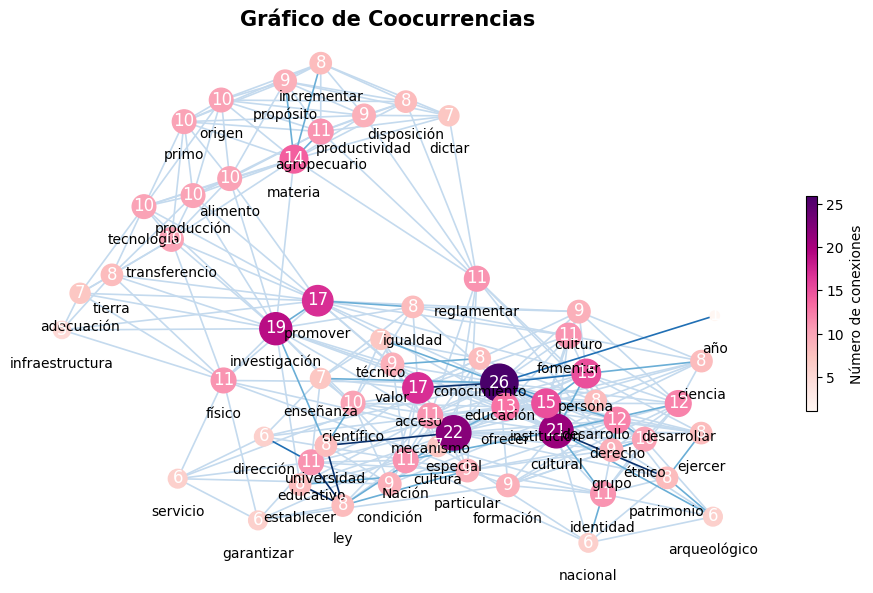

<Axes: title={'center': 'Gráfico de Coocurrencias'}>

<Figure size 640x480 with 0 Axes>

In [ ]:
## Graficar co-ocurrencias de palabras en el texto
graficar_coocurencia(mat_ven, ubicacion_archivo='grafo_example.jpg', dim_figura=(12,7), visualizar=True, seed = 31,
                      offset_y =0.13, vmin= 20)

In [ ]:
# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(texto, max_num=60, modo='ventana', ventana=5)
mat_ven

,Nación,acceso,adecuación,agropecuario,alimento,arqueológico,año,ciencia,científico,condición,...,propósito,reglamentar,servicio,tecnología,tierra,transferencio,técnico,universidad,valor,étnico
Nación,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
acceso,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
adecuación,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
agropecuario,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alimento,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
arqueológico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
año,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ciencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
científico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
condición,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<ipython-input-34-a324df535cff>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  node_cmap = cm.get_cmap(node_cmap)
<ipython-input-34-a324df535cff>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = cm.get_cmap(edge_cmap)


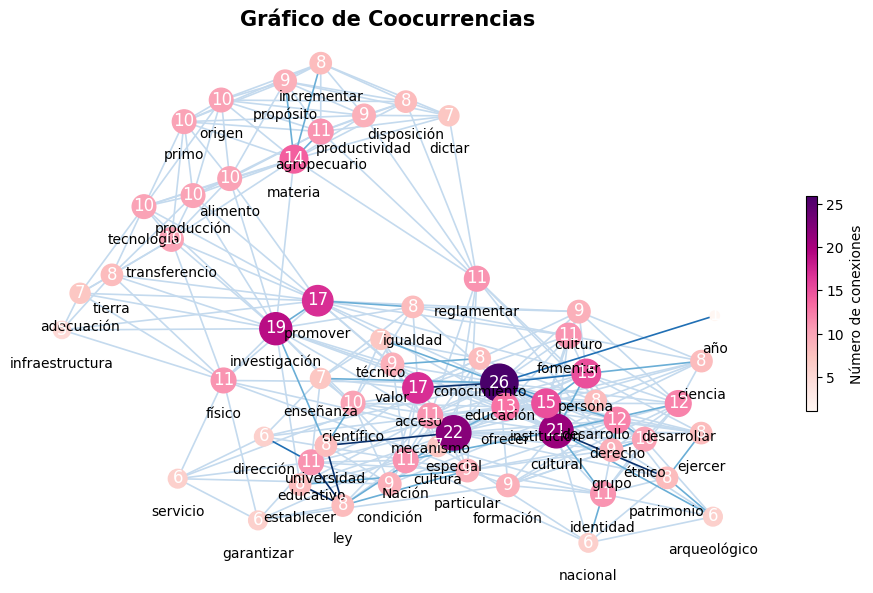

<Axes: title={'center': 'Gráfico de Coocurrencias'}>

<Figure size 640x480 with 0 Axes>

In [ ]:

## Graficar co-ocurrencias de palabras en el texto

graficar_coocurencia(mat_ven, ubicacion_archivo='grafo_doc_full.jpg', dim_figura=(12,7), visualizar=True, seed = 31,
                     offset_y =0.13, vmin= 20)

Análisis
<br>
En el gráfico de coocurrencias a partir del texto de los artículos del 65 al 71 de la constitución política de Colombia, se observa que los términos "conocimiento" (26 conexiones), "promover" (19), "mecanismo" (22) y "educación" (17) son centrales en el análisis, lo que significa que son conceptos claves que co-aparecen frecuentemente con otros términos.
El análisis probablemente está enfocado en un tema de educación, ciencia o políticas públicas, con términos asociados a promoción del conocimiento, investigación y desarrollo educativo.
Otros términos importantes son "cultural", "universidad", "igualdad", "reglamentar" y "formación", lo que podría indicar que el corpus analiza temas relacionados con la promoción de la cultura, la igualdad en la educación y la regulación de políticas.
